# Data preparation from slack chat (downloaded to txt files)

In [1]:
from datetime import datetime
import pandas as pd
import re

In [27]:
def is_time(stri):
    is_tm=0
    try:
        datetime.strptime(stri, '%M:%S%p')
        is_tm=1
    except:
        TypeError
        
    try:
        datetime.strptime(stri, '%I:%M %p')
        is_tm=1
    except:
        TypeError
    return is_tm

In [3]:
def is_date(stri):
    is_dt=0
    try:
        datetime.strptime(stri, '%d.%m.%Y')
        is_dt=1
    except:
        TypeError
    return is_dt

In [28]:
#is_time('7:50 PM')
datetime.strptime('7:50 PM', '%I:%M %p')

datetime.datetime(1900, 1, 1, 19, 50)

In [5]:
#is_date('30.07.2018')
#li='sdfmns[fds]d'
#li[0:li.find('[')]

In [185]:
def df_from_txt_file(path):
    file = open(path,'r')
    reader=file.readlines()
    flag=0
    #nmb_msgs=0
    topic=path 
    dt='' 
    auth='' 
    t_h=0
    t_m=0
    message=''
    authors=[]
    d=[]

    i=0

    for line in reader:
        line=line.lower()
        if len(line)>10 and (is_time(line[-9:-2].rstrip()) or is_time(line[-10:-2].rstrip())):
            #print(topic, dt, auth, tme, message)
            if flag>0:
                d.append([topic, dt, auth, t_h, t_m, message])
            #nmb_msgs+=1
            #new_message=True
            if is_time(line[-9:-2].rstrip()):
                t=datetime.strptime(line[-9:-2].rstrip(), '%I:%M %p')
                t_h=t.hour
                t_m=t.minute
            else:
                t=datetime.strptime(line[-10:-2].rstrip(), '%I:%M %p')
                t_h=t.hour
                t_m=t.minute
            auth=line[0:line.find('[')]
            flag=1
            if (auth not in authors) and ('pasted' not in auth):#and auth[0:6]!='Pasted' and auth[0:5]!='Pasted':
                authors.append(auth)
            message=''
        if len(line)>10 and is_date(line.rstrip()):
            #flag=1
            dt=datetime.strptime(line.rstrip(), '%d.%m.%Y')
        #print(nmb_dates, nmb_msgs, i, line[-9:-2], line[-10:-2], len(line), line.rstrip())
        i+=1
        message+=line

#print(nmb_dates, nmb_msgs, i)
#print(d)

    df_test = pd.DataFrame.from_records(d, columns=['topic', 'date', 'author', 'hour', 'minute', 'message'])
    return df_test

In [243]:
df.drop
d0 = {'topic': [], 'date': [], 'author': [], 'hour': [], 'minute': [], 'message': []}
df = pd.DataFrame(data=d0)

for path in ['checkups', 'lessons', 'vacancies', 'consulting', 'homeworks', 'pyda1', 'sql', 'introduction']:
    df=pd.concat([df, df_from_txt_file(path)])

In [244]:
df.head(15)

,topic,date,author,hour,minute,message
0,checkups,2018-08-13,адель,16.0,48.0,адель [4:48 pm]\nпривет!\nвпереди у вас 4 пров...
1,checkups,2018-08-13,адель,16.0,49.0,адель [4:49 pm]\nпервая лабораторная работа пр...
2,checkups,2018-08-13,anna kirichenko,16.0,57.0,anna kirichenko [4:57 pm]\njoined #проверочные...
3,checkups,2018-08-13,адель,17.0,5.0,"адель [5:05 pm]\nона будет онлайн, сейчас попр..."
4,checkups,2018-08-13,ivan_k,17.0,6.0,"ivan_k [5:06 pm]\nно ведь видиозапись лады,буд..."
5,checkups,2018-08-13,dima muzalevskiy,17.0,11.0,dima muzalevskiy [5:11 pm]\njoined #проверочны...
6,checkups,2018-08-13,ivan_k,17.0,16.0,ivan_k [5:16 pm]\n@адель @dima muzalevskiy а ...
7,checkups,2018-08-13,igor bezrukikh,17.0,18.0,igor bezrukikh [5:18 pm]\njoined #проверочные ...
8,checkups,2018-08-13,stratosferova,17.0,51.0,stratosferova [5:51 pm]\nа можно прямо по пров...
9,checkups,2018-08-13,arseny,18.0,15.0,arseny [6:15 pm]\n@адель добрый день! лаборато...


In [286]:
df[df['author'].str.contains("pasted")].head(15)
#df.info()

#df.drop([58,137,140,151,73,64,66,86,91],axis=0, inplace=True)

,topic,date,author,hour,minute,message,student_netology,year_month,weekday
58,lessons,2018-08-13,"pasted image at 2018-08-13, 7:46 pm",19.0,46.0,"pasted image at 2018-08-13, 7:46 pm \n\nнадо д...",student,201808,1
137,lessons,2018-08-27,"pasted image at 2018-08-27, 9:46 pm",21.0,46.0,"pasted image at 2018-08-27, 9:46 pm \n\n\n",student,201808,1
140,lessons,2018-08-27,"pasted image at 2018-08-27, 10:09 pm",22.0,9.0,"pasted image at 2018-08-27, 10:09 pm \n\n\n",student,201808,1
151,homeworks,2018-08-29,"pasted image at 2018-08-24, 8:22 pm",20.0,22.0,"pasted image at 2018-08-24, 8:22 pm \n\n\n\n29...",student,201808,3
73,pyda1,2018-09-17,"pasted image at 2018-09-17, 9:18 pm",21.0,18.0,"pasted image at 2018-09-17, 9:18 pm \n\n\n",student,201809,1
64,sql,2018-08-01,"pasted image at 2018-08-01, 1:02 am",1.0,2.0,"pasted image at 2018-08-01, 1:02 am \n\n\n",student,201808,3
66,sql,2018-08-01,"pasted image at 2018-08-01, 1:24 am",1.0,24.0,"pasted image at 2018-08-01, 1:24 am \n\n\n",student,201808,3
86,sql,2018-08-01,"pasted image at 2018-08-01, 3:01 pm",15.0,1.0,"pasted image at 2018-08-01, 3:01 pm \n\n\n",student,201808,3
91,sql,2018-08-01,"pasted image at 2018-08-01, 3:35 pm",15.0,35.0,"pasted image at 2018-08-01, 3:35 pm \n\n\n",student,201808,3


In [246]:
def stud_net(var):
    stud_n='student'
    if  var.rstrip() in ['aleksandr dzhumurat', 'dima muzalevskiy', 'адель', 'kira', 'руслан, координатор', 'настя дорожкина']:
        stud_n='Netology'
    return stud_n

In [181]:
stud_net('dima muzalevskiy')

'Netology'

In [266]:
#df[df['author']==''].head(15)

df['student_netology'] = df['author'].apply(lambda x: stud_net(x))
df['year_month'] = df['date'].apply(lambda x: x.year*100+x.month)
df['weekday'] = df['date'].apply(lambda x: x.isoweekday())

In [267]:
#df[df['message'].'РМ'].head(15)
#df[df['message'].str.contains("PM")].head(15)
df.head()

,topic,date,author,hour,minute,message,student_netology,year_month,weekday
0,checkups,2018-08-13,адель,16.0,48.0,адель [4:48 pm]\nпривет!\nвпереди у вас 4 пров...,Netology,201808,1
1,checkups,2018-08-13,адель,16.0,49.0,адель [4:49 pm]\nпервая лабораторная работа пр...,Netology,201808,1
2,checkups,2018-08-13,anna kirichenko,16.0,57.0,anna kirichenko [4:57 pm]\njoined #проверочные...,student,201808,1
3,checkups,2018-08-13,адель,17.0,5.0,"адель [5:05 pm]\nона будет онлайн, сейчас попр...",Netology,201808,1
4,checkups,2018-08-13,ivan_k,17.0,6.0,"ivan_k [5:06 pm]\nно ведь видиозапись лады,буд...",student,201808,1


In [116]:
#df.groupby('author').count().sort_values(asc=False) 
df.groupby(['studen_netology'])['message'].count().\
    reset_index(name='count').sort_values(by=['count'], ascending=False)



,student/netology,count
1,student,738
0,Netology,265


In [253]:
#by_hour=df.groupby(['hour', 'student_netology'])['message'].count().\
#    reset_index(name='count').sort_values(by=['hour'], ascending=True)


by_hour=df.pivot_table(index = 'hour', columns = 'student_netology', \
                       values = 'message', aggfunc = 'count', fill_value = 0)

#by_hour['hour'] = by_hour.hour.astype('int64')
by_hour

student_netology,Netology,student
hour,,
1.0,18,68
2.0,7,27
3.0,1,2
4.0,0,1
6.0,0,3
7.0,4,4
8.0,7,12
9.0,5,15
10.0,8,22


# Matplotlib

Text(18.1063,0.5,'nmb_messages')

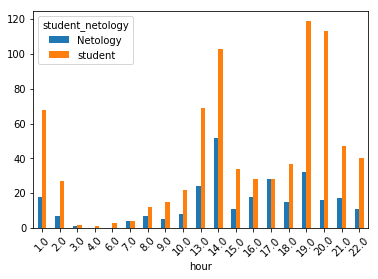

In [270]:
#by_hour.plot(by_hour['hour'], by_hour['count'])#, kind='scatter')
#plt.plot(by_hour['hour'], by_hour['count'], kind='scatter')

by_hour.plot(kind='bar', rot=45)
#ax.set_title('messages distribution by hour during a day')
#ax.set_ylabel('nmb_messages')
#print(len(by_hour['count']))

In [ ]:
#количество сообщений по часам. Гистограмма наглядна. Есть два пика активности

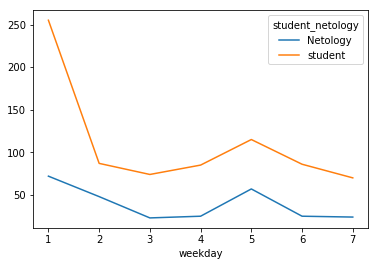

In [275]:
by_weekday=df.pivot_table(index = 'weekday', columns = 'student_netology', \
                       values = 'message', aggfunc = 'count', fill_value = 0)

#by_hour['hour'] = by_hour.hour.astype('int64')
ax.set_title('messages distribution by hour during a day')
ax.set_xlabel('weekday')
ax.set_ylabel('nmb_messages')

by_weekday.plot()


#by_weekday.plot.show()

#by_hour['count'].plot(
    #bottom=by_hour['hour'], 
#    kind='bar'
#    );
#by_hour.plot(x=by_hour['count'],bottom=by_hour['hour'], kind='bar',  rot=45);

In [ ]:
#количество сообщений по дням недели. График также показателен. 
#Понедельник и пятница - дни занятий максимальны по количеству сообщений

Text(0,0.5,'nmb_messages')

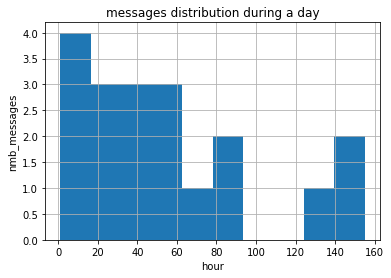

In [218]:

ax = by_hour['count'].hist()
ax.set_title('messages distribution during a day')
ax.set_xlabel('hour')
ax.set_ylabel('nmb_messages')


In [ ]:
# затруднительно это трактовать

# Wordcloud

In [121]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

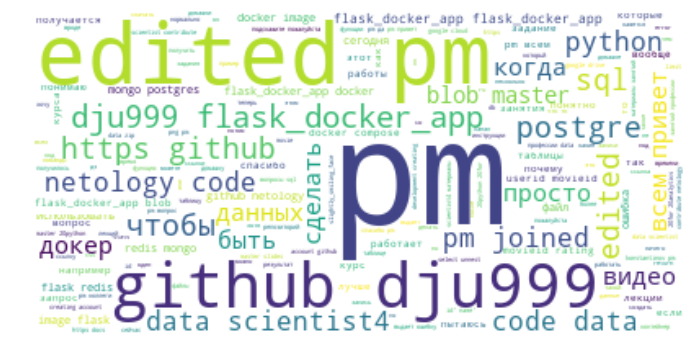

In [160]:
text = " ".join(review.lower() for review in df['message'])

lis=['на', 'из', 'по','без', 'что','для','до','но', 'от', \
         'меня','мы', 'мне','это', 'этого', 'все', 'всё', 'всего', 'они', 'всем','она','он', \
         'кто','что','вас', 'нас','какой', \
         'вам', 'нам', 'их', 'еще','ещё',\
         'или', 'и', 'а', \
         'нужно', 'надо','можно', 'может', 'могут','могу','будет', 'был','было','была','будут',\
         'так','если','как', 'только', 'даже','пока',\
         'не','ни','бы', 'но',\
         'да','нет',\
         'то','про','тоже','вы','еще','там','есть', \
         'ну','раз','тут','через','же','где','при','за','его',\
         'без', 'да', 'ты','уже',\
         'чему','очень','ли','вот', '<без медиафайлов>', 'без медиафайлов', 'медиафайлов']

# удаление из текста слова, отделенного слева пробелом, справа другим символом
for item in lis:
    text=text.replace(' '+item+' ', ' ')
    text=text.replace(' '+item+'.', ' ')
    text=text.replace(' '+item+',', ' ')
    text=text.replace(' '+item+'!', ' ')
    text=text.replace(' '+item+'?', ' ')
    text=text.replace(' '+item+'/n', ' /n ')
    text=text.replace(' '+item+'\n', ' \n ')
    text=text.replace('<'+item+'>', ' ')    

for item in   df['author']:
    text=text.replace(item, '')

wordcloud = WordCloud(background_color="white").generate(text)
#wordcloud = WordCloud().generate('вася вася петя')

fig, ax = plt.subplots(figsize=(11.7, 8.27) )
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

In [ ]:
#наиболее частые слова в сообщениях

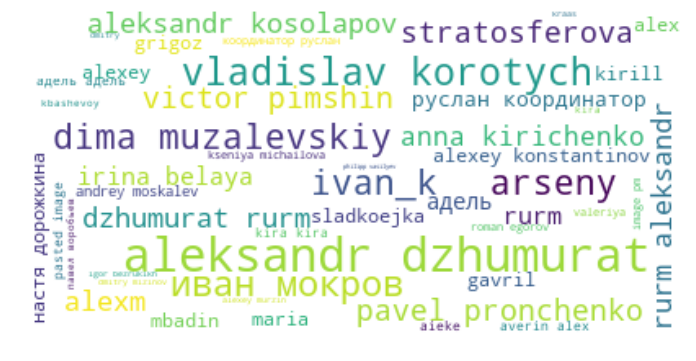

In [161]:
text = " ".join(review for review in df['author'])

wordcloud = WordCloud(background_color="white").generate(text)

fig, ax = plt.subplots(figsize=(11.7, 8.27) )
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

In [ ]:
# наиболее активные участники обучающего процесса

# Seaborn

In [256]:
import seaborn as sns

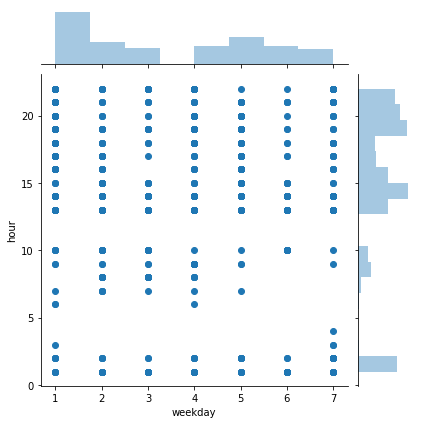

In [281]:
sns.jointplot(x='weekday', y='hour', 
              data=df, kind='scatter');

In [ ]:
# не очень наглядно

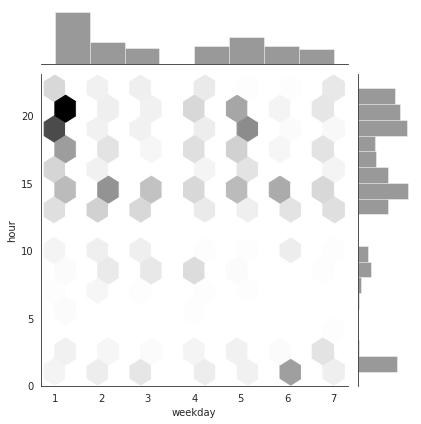

In [279]:
x=df['weekday'] 
y = df['hour']
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

In [ ]:
#с изменением насыщенности цвета видно активность вечером по пн и пт

In [315]:
df=df[df['author'].str.contains('pasted', case=False)==False]
#'pasted image at 2018-09-17, 9:18 pm']

In [316]:
dynam_by_user=df.pivot_table(index = 'author', columns = 'year_month', \
                       values = 'message', aggfunc = 'count', fill_value = 0)#.sort_values(by='count')

#dynam_by_user[dynam_by_user['author']!='pasted']#.sort_values(by='201809')
dynam_by_user#.head()

#dynam_by_user = dynam_by_user.reindex(dynam_by_user['author'].sort_values(by=201809, ascending=False).index)


year_month,201807,201808,201809,201810
author,,,,
```иван мокров,1,0,0,0
aieke,0,0,7,1
akorovin,1,0,0,0
aleksandr dzhumurat,12,116,0,0
aleksandr kosolapov,4,22,4,0
alex,0,10,2,0
alexander dobrynin,0,2,0,0
alexey,0,15,0,0
alexey konstantinov,1,15,0,0


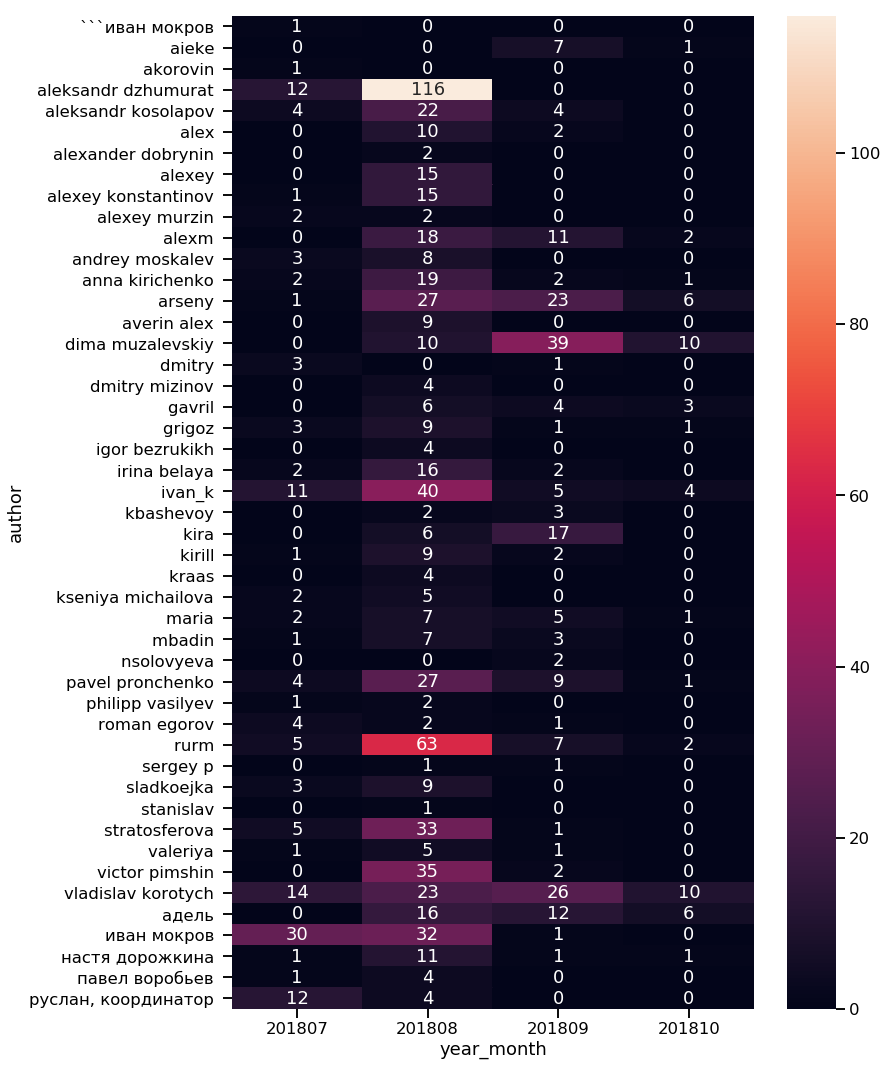

In [317]:
fig, ax = plt.subplots(figsize=(11.7, 18.27) )
sns.set_context("talk")
sns.heatmap(dynam_by_user, annot=True, fmt='g')

In [ ]:
#динамика сообщений по пользователям

# Plotly

In [282]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [325]:
dynam_stud_net=df.pivot_table(index = 'year_month', columns = 'student_netology', \
                       values = 'message', aggfunc = 'count', fill_value = 0)#.sort_values(by='count')
dynam_stud_net

student_netology,Netology,student
year_month,,
201807,25,108
201808,163,497
201809,69,126
201810,17,32


In [324]:
trace0 = go.Scatter(
    x=dynam_stud_net.index,
    y=dynam_stud_net.student,
    name='student'
)

trace1 = go.Scatter(
    x=dynam_stud_net.index,
    y=dynam_stud_net.Netology,
    name='Netology'
)

data = [trace0, trace1]
layout = {'title': 'messages_by_month'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [326]:
trace0

Scatter({
    'name': 'student', 'x': array([201807, 201808, 201809, 201810]), 'y': array([108, 497, 126,  32])
})

In [328]:
plotly.offline.plot(fig, filename='dynam.html', show_link=False);

In [ ]:
#график почему-то отображается только в отдельном окне.
#Максимальное количество сообщений в августе в начале курса